# Data Science Project : 'Cars - Purchase Decision Dataset'

 This dataset contains details of 1000 customers who intend to buy a car, considering their annual salaries.

- Columns:
- User ID
- Gender
- Age
- Annual Salary
- Purchase Decision (No = 0; Yes = 1)
 ## In this data set we are predicting whether the person make decision to buy a car or not

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



## Load Data

In [2]:
df = pd.read_csv('car_data.csv')
df.head(10)


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [3]:
df.shape

(1000, 5)

In [4]:
# show basic information of the data 
df.info

<bound method DataFrame.info of      User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]>

In [5]:
df.describe()


,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [6]:
df2 = df.copy()
df2[df['Purchased'] == 1]

df2.loc[df['Purchased'] == 1, 'Purchased'] = 'Yes'
df2.loc[df['Purchased'] == 0, 'Purchased'] = 'No'

df2.head()


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,No
1,681,Male,40,43500,No
2,353,Male,49,74000,No
3,895,Male,40,107500,Yes
4,661,Male,25,79000,No


In [7]:
# distribution of gender + Purchased (in percentage)
total_data = len(df2)
df2.groupby(['Gender', 'Purchased']).size()/ total_data * 100


Gender  Purchased
Female  No           29.7
        Yes          21.9
Male    No           30.1
        Yes          18.3
dtype: float64

In [13]:
df.isnull()

,User ID,Gender,Age,AnnualSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [24]:
df.isnull().sum()

Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

## Observations
- User ID - Should drop this column as it won't help the model.
- Age - Minimum - 18 years , Maximum - 63 years , Mean is nearly equal to Median - Normal distribution expected!
- AnnualSalary - Minimum - 15000 , Maximum - 152500


# Exploratory Data Analysis

# Data Visualization

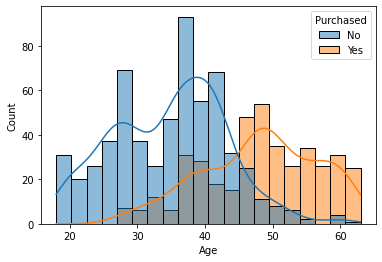

In [8]:
sns.histplot(data=df2, x='Age', hue='Purchased', kde=True, bins=20);


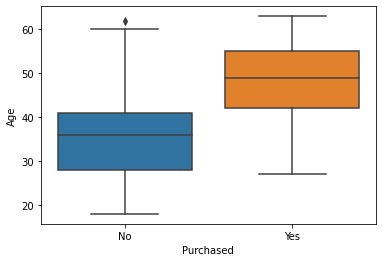

In [9]:
sns.boxplot(data=df2, x='Purchased', y='Age');


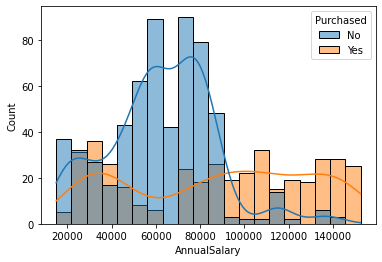

In [10]:
sns.histplot(data=df2, x='AnnualSalary', hue='Purchased', kde=True, bins=20);


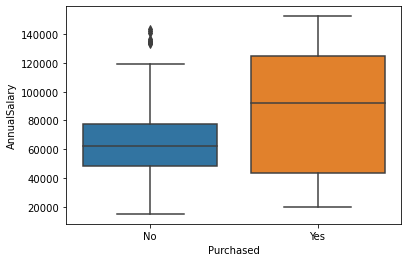

In [11]:
sns.boxplot(data=df2, x='Purchased', y='AnnualSalary');


<AxesSubplot:xlabel='Gender', ylabel='count'>

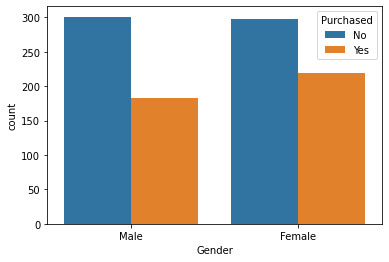

In [12]:
sns.countplot(data=df2, x='Gender', hue='Purchased')


# Pre-processing

In [22]:
df.loc[df['Gender'] == 'Male', 'Gender'] = 0
df.loc[df['Gender'] == 'Female', 'Gender'] = 1
# drop user id column from dataset
df = df.drop(columns=['User ID'])


In [23]:
df

,Gender,Age,AnnualSalary,Purchased
0,0,35,20000,0
1,0,40,43500,0
2,0,49,74000,0
3,0,40,107500,1
4,0,25,79000,0
...,...,...,...,...
995,0,38,59000,0
996,1,47,23500,0
997,1,28,138500,1
998,1,48,134000,1


# Model Building

In [26]:
#For data split
from sklearn.model_selection import train_test_split

#Model RandomForest, LogicticRegression, Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#For model performance evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [27]:
#Splitting Data

train, test = train_test_split(df, test_size=0.2, random_state=17)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")


No. of training examples: 800
No. of testing examples: 200


In [28]:
#X and Y for Train
x_train=train.drop('Purchased',axis=1)
y_train=train[['Purchased']]

#X and Y for Test
x_test=test.drop('Purchased',axis=1)
y_test=test[['Purchased']]

#Shapes x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((800, 3), (800, 1), (200, 3), (200, 1))

In [29]:
x_train.head()


,Gender,Age,AnnualSalary
421,1,41,57500
165,0,58,61500
628,1,18,68000
785,1,44,62500
393,1,54,148500


In [30]:
y_train.head()


,Purchased
421,0
165,1
628,0
785,0
393,1


# Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [32]:
lr_score = lr.score(x_test, y_test)
lr_score


0.44823875929716883

In [33]:
y_pred = lr.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])


[0.54661034 0.148468   0.87701049 0.86698457 0.35419052]
[1 1 1 1 0]


In [34]:
lr_mse = mean_squared_error(y_test.values, y_pred)
lr_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
lr_mae = mean_absolute_error(y_test.values, y_pred)
lr_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(lr_mse))
print('Score Root Mean Squared Error = {}'.format(lr_rmse))
print('Score Mean Absolute Error     = {}'.format(lr_mae))
print('Score R2                      = {}'.format(lr_r))


Score Mean Squared Error      = 0.1246842463678223
Score Root Mean Squared Error = 0.3531065651723603
Score Mean Absolute Error     = 0.2880422492526524
Score R2                      = 0.44823875929716883


In [42]:
prediction = pd.DataFrame()
prediction['Actual'] = y_test.values.flatten()
prediction['Linear Regression'] = y_pred.flatten()
prediction['Linear Regression'] = prediction['Linear Regression'].round(0)
prediction.head(20)


,Actual,Linear Regression
0,1,1.0
1,1,0.0
2,1,1.0
3,1,1.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,1,1.0


# Decision Tree

In [44]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)


DecisionTreeRegressor()

In [45]:
dt_score = dt.score(x_test, y_test)
dt_score


0.4468414647638014

In [46]:
y_pred = dt.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])


[1. 0. 1. 1. 0.]
[1 1 1 1 0]


In [47]:
dt_mse = mean_squared_error(y_test.values, y_pred)
dt_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
dt_mae = mean_absolute_error(y_test.values, y_pred)
dt_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(dt_mse))
print('Score Root Mean Squared Error = {}'.format(dt_rmse))
print('Score Mean Absolute Error     = {}'.format(dt_mae))
print('Score R2                      = {}'.format(dt_r))


Score Mean Squared Error      = 0.125
Score Root Mean Squared Error = 0.3535533905932738
Score Mean Absolute Error     = 0.125
Score R2                      = 0.4468414647638014


In [48]:
prediction['DecisionTree'] = y_pred.flatten()
prediction['DecisionTree'] = prediction['DecisionTree'].round(0)
prediction.head(20)


,Actual,Linear Regression,RandomForest,DecisionTree
0,1,1.0,1.0,1.0
1,1,0.0,0.0,0.0
2,1,1.0,1.0,1.0
3,1,1.0,1.0,1.0
4,0,0.0,0.0,0.0
5,0,0.0,0.0,0.0
6,0,0.0,0.0,0.0
7,0,0.0,0.0,0.0
8,0,0.0,0.0,0.0
9,1,1.0,1.0,1.0


# Random Forest

In [36]:
rf = RandomForestRegressor(max_depth=10, random_state=0)

rf.fit(x_train,y_train)


C:\Users\Dell\AppData\Local\Temp\ipykernel_14736\3208043834.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=10, random_state=0)

In [37]:
rf_score = rf.score(x_test, y_test)
rf_score


0.7555781211040136

In [38]:
y_pred = rf.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])


[1.   0.46 1.   0.89 0.  ]
[1 1 1 1 0]


In [39]:
rf_mse = mean_squared_error(y_test.values, y_pred)
rf_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
rf_mae = mean_absolute_error(y_test.values, y_pred)
rf_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(rf_mse))
print('Score Root Mean Squared Error = {}'.format(rf_rmse))
print('Score Mean Absolute Error     = {}'.format(rf_mae))
print('Score R2                      = {}'.format(rf_r))


Score Mean Squared Error      = 0.05523323408352055
Score Root Mean Squared Error = 0.2350175186736524
Score Mean Absolute Error     = 0.1129757122366239
Score R2                      = 0.7555781211040136


In [43]:
prediction['RandomForest'] = y_pred.flatten()
prediction['RandomForest'] = prediction['RandomForest'].round(0)
prediction.head(20)


,Actual,Linear Regression,RandomForest
0,1,1.0,1.0
1,1,0.0,0.0
2,1,1.0,1.0
3,1,1.0,1.0
4,0,0.0,0.0
5,0,0.0,0.0
6,0,0.0,0.0
7,0,0.0,0.0
8,0,0.0,0.0
9,1,1.0,1.0


# Comparison between  Linear Regression, Dicision Tree and Random Forest

In [50]:
print('Score MSE LinearRegression  = {}'.format(lr_mse))
print('Score MSE DecisionTree      = {}'.format(dt_mse))
print('Score MSE RandomForest      = {}'.format(rf_mse))

print('='*55)
print('Score RMSE LinearRegression = {}'.format(lr_rmse))
print('Score RMSE DecisionTree     = {}'.format(dt_rmse))
print('Score RMSE RandomForest     = {}'.format(rf_rmse))

print('='*55)
print('Score MAE LinearRegression  = {}'.format(lr_mae))
print('Score MAE DecisionTree      = {}'.format(dt_mae))
print('Score MAE RandomForest      = {}'.format(rf_mae))

print('='*55)
print('Score R2 Linear Regression  = {}'.format(lr_r))
print('Score R2 DecisionTree       = {}'.format(dt_r))
print('Score R2 RandomForest       = {}'.format(rf_r))


Score MSE LinearRegression  = 0.1246842463678223
Score MSE DecisionTree      = 0.125
Score MSE RandomForest      = 0.05523323408352055
Score RMSE LinearRegression = 0.3531065651723603
Score RMSE DecisionTree     = 0.3535533905932738
Score RMSE RandomForest     = 0.2350175186736524
Score MAE LinearRegression  = 0.2880422492526524
Score MAE DecisionTree      = 0.125
Score MAE RandomForest      = 0.1129757122366239
Score R2 Linear Regression  = 0.44823875929716883
Score R2 DecisionTree       = 0.4468414647638014
Score R2 RandomForest       = 0.7555781211040136
